In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

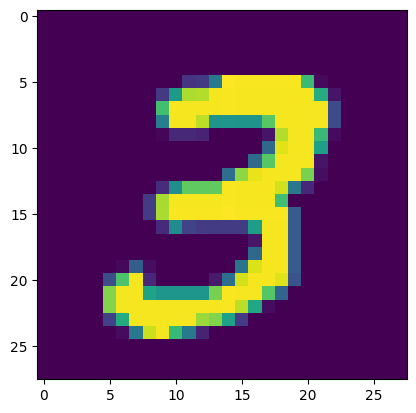

In [12]:
import matplotlib.pyplot as plt
plt.imshow(X_train[7])

In [19]:
X_train[0][0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=uint8)

In [20]:
# convert data into range of 0 to 1

X_train = X_train/255
X_test = X_test/255

In [39]:
model = Sequential()

model.add(Flatten(input_shape=(28, 28)))
   # usually 'relu' activationo function gives better accuracy
   # not need of input it get auto
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [40]:
# it shows the summary of our model

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
# metrics gives to because when we train model shows accuracy of each level
# losss is 'sparse_categorical_crossentropy'

model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])


In [42]:
history = model.fit(X_train, y_train, epochs=25, validation_split=0.2)

Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8582 - loss: 0.4940 - val_accuracy: 0.9526 - val_loss: 0.1609
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9603 - loss: 0.1326 - val_accuracy: 0.9660 - val_loss: 0.1145
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9749 - loss: 0.0840 - val_accuracy: 0.9663 - val_loss: 0.1116
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9791 - loss: 0.0663 - val_accuracy: 0.9719 - val_loss: 0.0954
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9853 - loss: 0.0475 - val_accuracy: 0.9703 - val_loss: 0.1035
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9874 - loss: 0.0379 - val_accuracy: 0.9727 - val_loss: 0.0960
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9911 - loss: 0.0295 - val_accuracy: 0.9746 - val_loss: 0.0958
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9917 - loss: 0.0259 -

In [43]:
y_prob = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [44]:
y_pred = y_prob.argmax(axis=1)

In [45]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9783

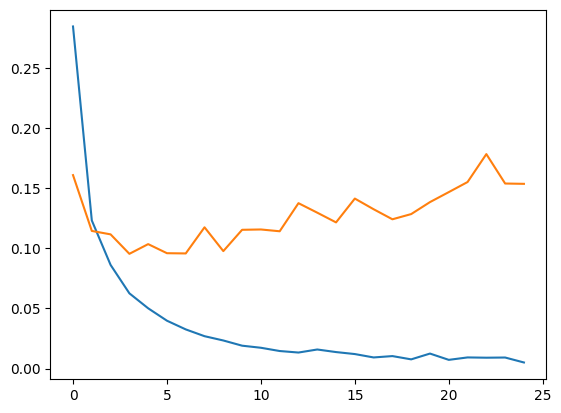

In [46]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

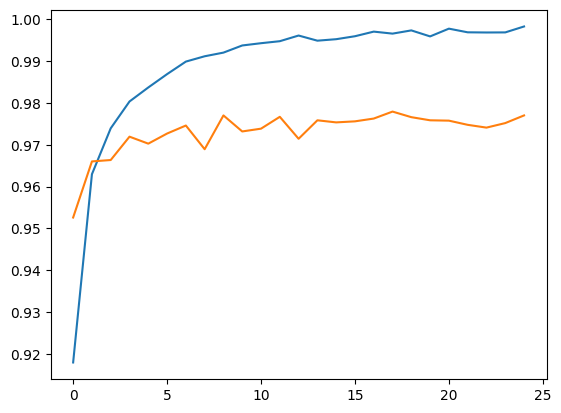

In [47]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

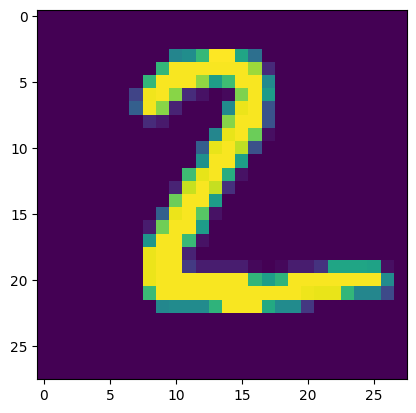

In [48]:
plt.imshow(X_test[1])

In [49]:
model.predict(X_test[1].reshape(1, 28, 28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


array([2])